In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
Total_Accidents = pd.read_csv("Boat Resources/Total Accidents V3.csv")      #Importing Total Accident Data per state for 1996-2020
Total_Accidents.dropna(inplace=True)                                        #Dropping Rows with Empty Value
Total_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,120,173,138,118,114,87,70,83,70,...,73,71,62,71,79,46,70,66,101,96
1,Alaska,91,90,99,77,68,64,42,48,52,...,20,23,18,18,25,26,15,22,14,22
2,Arizona,327,321,239,302,331,222,217,188,174,...,158,99,95,87,97,90,123,129,96,162
3,Arkansas,92,111,115,91,87,75,74,50,55,...,55,68,56,54,49,47,64,60,37,75
4,California,849,920,770,894,900,771,745,797,603,...,399,365,426,379,369,386,350,322,324,493


In [4]:
Fatalities = pd.read_csv("Boat Resources/Fatalities V3.csv")                #Importing Total Fatality Data per state for 1996-2020
Fatalities.dropna(inplace=True)                                             #Dropping Rows with Empty Value
Fatalities.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24,25,32,17,11,17,12,15,20,...,19,17,10,13,21,14,21,17,28,19
1,Alaska,14,23,38,26,18,21,16,21,16,...,15,22,10,11,7,19,20,22,11,24
2,Arizona,8,8,14,9,12,7,8,7,11,...,11,4,9,7,6,5,13,11,7,10
3,Arkansas,20,15,20,15,10,13,24,6,8,...,15,8,15,8,9,10,11,7,10,13
4,California,56,42,56,42,49,48,53,61,43,...,52,49,37,38,48,47,50,34,39,39


In [5]:
Fatal_Accidents = pd.read_csv("Boat Resources/Fatal Accidents V3.csv")       #Importing Total Fatal Accident Data per state for 1996-2020
Fatal_Accidents.dropna(inplace=True)                                         #Dropping Rows with Empty Value
Fatal_Accidents.head()

,State,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,21,24,27,17,11,16,12,15,17,...,14,16,10,12,17,12,18,13,25,12
1,Alaska,13,19,24,21,16,20,14,16,14,...,13,15,7,10,7,14,13,17,8,15
2,Arizona,7,7,10,7,9,7,8,5,10,...,10,3,9,7,6,5,11,6,7,7
3,Arkansas,19,14,18,14,9,12,20,6,5,...,13,8,13,7,9,9,11,7,10,13
4,California,48,41,45,36,40,43,46,56,35,...,47,37,34,29,41,43,49,33,37,37


In [6]:
Alcohol_Fatal = pd.read_csv("Boat Resources/Alcohol by State and Year V4.csv")  #Importing Total Fatal Accident with Alcohol as cause Data per state for 2010-2020
Alcohol_Fatal.dropna(inplace=True)                                              #Dropping Rows with Empty Value
Alcohol_Fatal.head()

,State,Average Deaths,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,4.090909,5,6,1,4,5,5,1,1,10,1,6
1,Alaska,4.181818,1,8,2,4,3,3,6,2,7,8,2
2,Arizona,1.545455,3,0,3,2,1,2,2,1,0,1,2
3,Arkansas,1.909091,0,4,2,2,2,2,3,2,4,0,0
4,California,4.636364,4,3,6,2,5,3,3,4,5,6,10


In [7]:
Alcohol_Fatal2 = Alcohol_Fatal.drop(columns=['2010','2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019', '2020'])         #Dropping year columns to just keep the average death per year
Alcohol_Fatal2.head()


,State,Average Deaths
0,Alabama,4.090909
1,Alaska,4.181818
2,Arizona,1.545455
3,Arkansas,1.909091
4,California,4.636364


In [8]:
Ave_Pop = pd.read_csv("Boat Resources/Population US by State and Year V3.csv")        #Importing Total Population Data Per State from US Census      
Ave_Pop.dropna(inplace=True)
Ave_Pop.head()

,State,Average Population,2010,2020
0,Alabama,"4,902,270","4,779,736","5,024,803"
1,Alaska,"721,336","710,231","732,441"
2,Arizona,"6,785,002","6,392,017","7,177,986"
3,Arkansas,"2,964,075","2,915,918","3,012,232"
4,California,"38,376,847","37,253,956","39,499,738"


In [9]:
Ave_Pop2 = Ave_Pop.drop(columns=['2010', '2020'])                               #Dropping year columns to just keep the Average Population
Ave_Pop2.head()


,State,Average Population
0,Alabama,"4,902,270"
1,Alaska,"721,336"
2,Arizona,"6,785,002"
3,Arkansas,"2,964,075"
4,California,"38,376,847"


In [10]:
Ave_Alcohol_Fatal = pd.merge(Alcohol_Fatal2, Ave_Pop2, on='State', how='outer')     #Merged average Population and Average Death Per Year
Ave_Alcohol_Fatal.head()

,State,Average Deaths,Average Population
0,Alabama,4.090909,"4,902,270"
1,Alaska,4.181818,"721,336"
2,Arizona,1.545455,"6,785,002"
3,Arkansas,1.909091,"2,964,075"
4,California,4.636364,"38,376,847"


In [11]:
Ave_Alcohol_Fatal["% Death Per Person"] = ""            #Made a New Column to store Data

In [12]:
Ave_Alcohol_Fatal.dtypes                    #Checked the type of data

State                  object
Average Deaths        float64
Average Population     object
% Death Per Person     object
dtype: object

In [13]:
Ave_Alcohol_Fatal['Average Population'] = Ave_Alcohol_Fatal['Average Population'].str.replace(",", "").astype(float)    #Cleaned Data to remove commas and change to float

In [86]:
Ave_Alcohol_Fatal["% Death Per Person"] = ((Ave_Alcohol_Fatal["Average Deaths"]/11)/Ave_Alcohol_Fatal["Average Population"])*100        #calculated %death per person and placed answer in the new column
Ave_Alcohol_Fatal.head()


,State,Average Deaths,Average Population,% Death Per Person
0,Alabama,4.090909,4902270.0,0.000008
1,Alaska,4.181818,721336.0,0.000053
2,Arizona,1.545455,6785002.0,0.000002
3,Arkansas,1.909091,2964075.0,0.000006
4,California,4.636364,38376847.0,0.000001


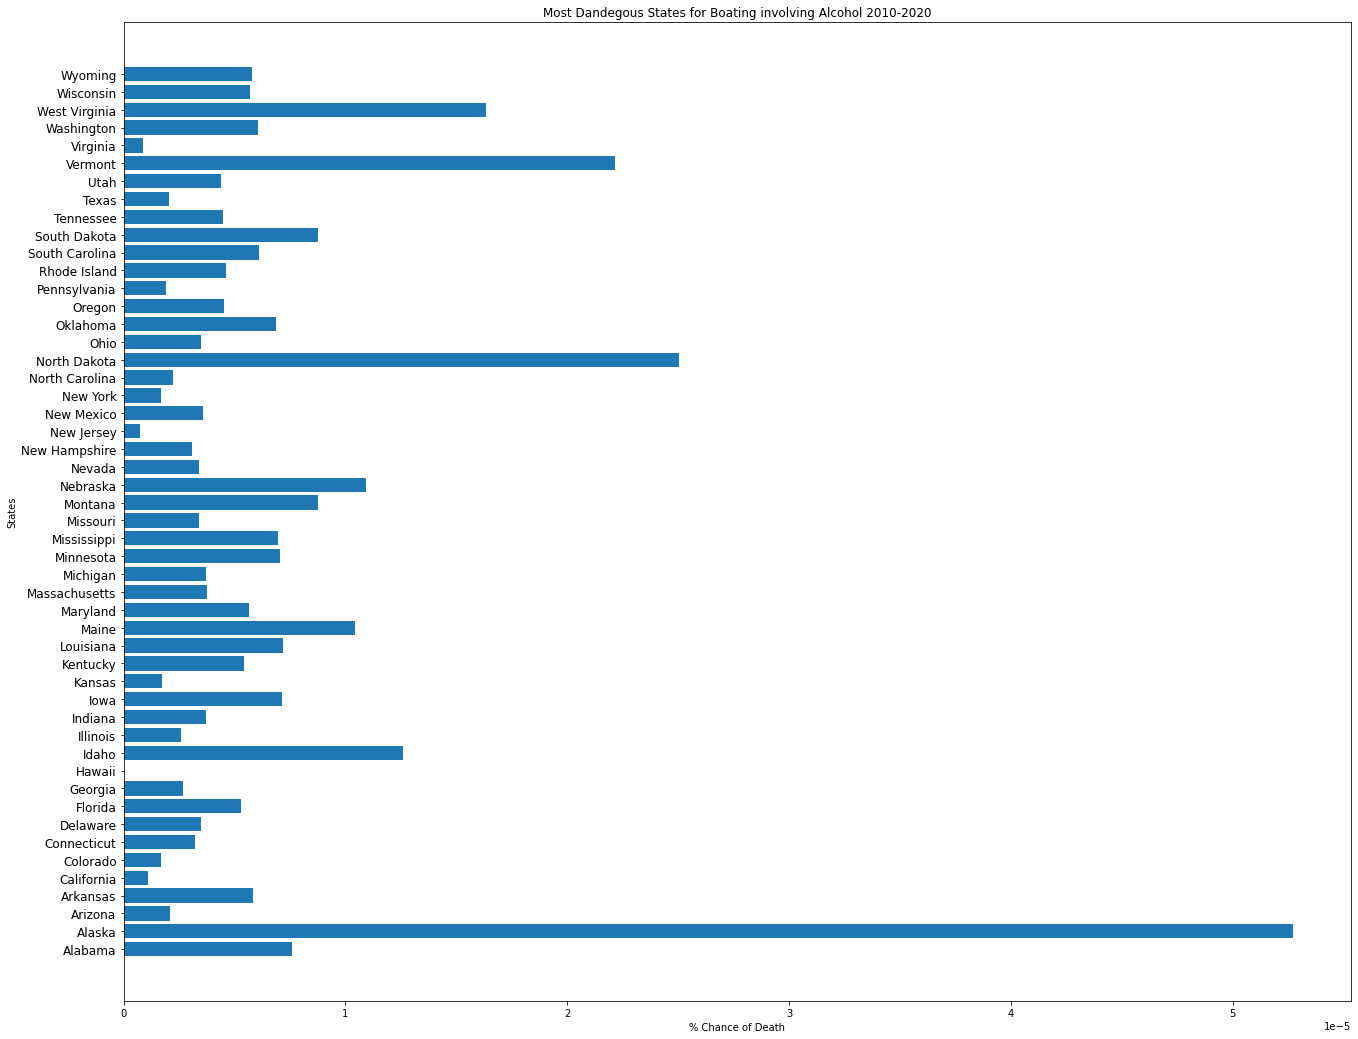

In [137]:
x_axis = Ave_Alcohol_Fatal["State"]                                                     #Ploted Data into a Bar Chart
y_axis = Ave_Alcohol_Fatal["% Death Per Person"]

plt.barh(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Boating involving Alcohol 2010-2020")
plt.xlabel("% Chance of Death")
plt.ylabel("States")
plt.xticks(fontsize= 10)
plt.rcParams["figure.figsize"] = (22,18)
plt.yticks(fontsize= 12)
plt.show()

In [139]:
Ave_Alcohol_Fatal_Most = Ave_Alcohol_Fatal.nlargest(5, '% Death Per Person')                    #Saved the top 5 and Bottom 5 results as variables
Ave_Alcohol_Fatal_Least = Ave_Alcohol_Fatal.nsmallest(5, '% Death Per Person')
Ave_Alcohol_Fatal_Least   

,State,Average Deaths,Average Population,% Death Per Person
10,Hawaii,0.000000,1406106.0,0.000000e+00
29,New Jersey,0.727273,9035819.0,7.317068e-07
45,Virginia,0.818182,8316534.0,8.943650e-07
4,California,4.636364,38376847.0,1.098286e-06
31,New York,3.636364,19766518.0,1.672417e-06


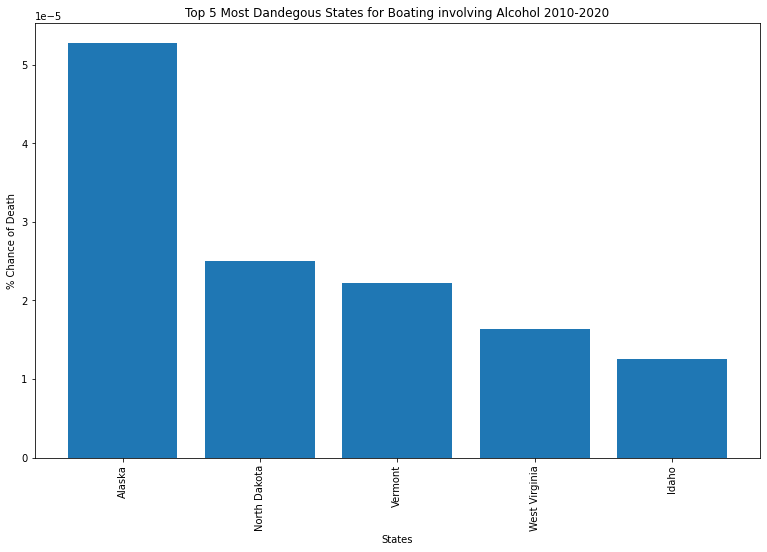

In [141]:
x_axis = Ave_Alcohol_Fatal_Most["State"]                                                    #Ploted Top 5 Most Dangerous States
y_axis = Ave_Alcohol_Fatal_Most["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Top 5 Most Dandegous States for Boating involving Alcohol 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [149]:
Sum_Fatal_Accidents = pd.read_csv("Boat Resources/summary_of_fatal_transport V3.csv")    #Imported Total Fatalities from Cars, Trains, Planes, and Boats per state
Sum_Fatal_Accidents.head()


<bound method NDFrame.head of              State  Car Fatals  Trains  Plane  Boat
0          Alabama        9993      18      2   199
1           Alaska         750       0     28   172
2          Arizona        9919       8      3    89
3         Arkansas        5955      11      0   120
4       California       37183      82      3   481
5         Colorado        5995      17      0   101
6      Connecticut        3031       0      0    55
7         Delaware        1265       0      0    21
8          Florida       31053      70      3   687
9          Georgia       15198      12      0   178
10          Hawaii        1165       0      5    44
11           Idaho        2346       5      0   113
12        Illinois       11120      50      0   175
13         Indiana        8944      21      0    86
14            Iowa        3798       8      3    66
15          Kansas        4443       9      0    49
16        Kentucky        8149       5      0   118
17       Louisiana        8172    

In [26]:
Sum_Fatal_Accidents['Trains'] = Sum_Fatal_Accidents['Trains'].astype(float)                     #Made data Floats
Sum_Fatal_Accidents['Plane'] = Sum_Fatal_Accidents['Plane'].astype(float)
Sum_Fatal_Accidents['Boat'] = Sum_Fatal_Accidents['Boat'].astype(float)
Sum_Fatal_Accidents['Car Fatals'] = Sum_Fatal_Accidents['Car Fatals'].astype(float)

In [36]:
Train_tot = Sum_Fatal_Accidents['Trains'].sum()                 #Totaled 3 Colums and saved as variables
Boat_tot = Sum_Fatal_Accidents['Boat'].sum()
Plane_tot = Sum_Fatal_Accidents['Plane'].sum()


([<matplotlib.patches.Wedge at 0x1367a904c88>,
 [Text(1.060243348961413, 0.29305979079888755, 'Train'),
  Text(-1.1680377521260505, -0.2751141755859254, 'Boat'),
  Text(1.0991909650872995, -0.042180828233351286, 'Plane')],
 [Text(0.5783145539789525, 0.15985079498121138, '8.6%'),
  Text(-0.6813553554068628, -0.16048326909178978, '90.2%'),
  Text(0.599558708229436, -0.02300772449091888, '1.2%')])

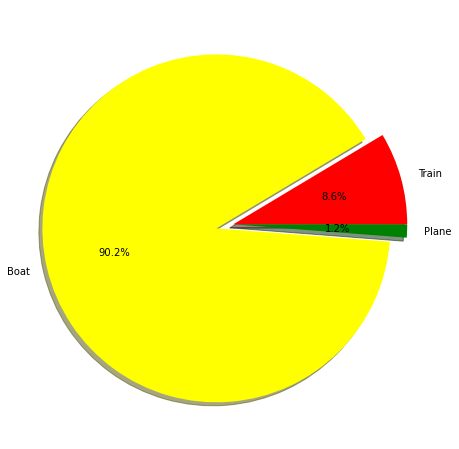

In [85]:
labels = ["Train", "Boat", "Plane"]                                     #Plotted in a Pie chart the variables
counts = [Train_tot, Boat_tot, Plane_tot]
colors = ["red", "yellow", "Green"]
explode = (0, 0.1, 0)
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,)

In [65]:
Sum_Fatal_Accidents3 = Sum_Fatal_Accidents.drop(columns=['Car Fatals'])                 # Summed the States Death Totals but dropped Car data and made a new column
Sum_Fatal_Accidents3["Total Deaths"] = ""
Sum_Fatal_Accidents3["Total Deaths"] = Sum_Fatal_Accidents3.sum(axis = 1)
Sum_Fatal_Accidents3.head()

c:\Users\Brendan\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,State,Trains,Plane,Boat,Total Deaths
0,Alabama,18.0,2.0,199.0,219.0
1,Alaska,0.0,28.0,172.0,200.0
2,Arizona,8.0,3.0,89.0,100.0
3,Arkansas,11.0,0.0,120.0,131.0
4,California,82.0,3.0,481.0,566.0


In [66]:
Sum_Fatal_Accidents["Total Deaths"] = ""                                        # Summed the States Death Totals and made a new column to store this in
Sum_Fatal_Accidents["Total Deaths"] = Sum_Fatal_Accidents.sum(axis = 1)
Sum_Fatal_Accidents.head()

c:\Users\Brendan\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,State,Car Fatals,Trains,Plane,Boat,Total Deaths
0,Alabama,9993.0,18.0,2.0,199.0,10212.0
1,Alaska,750.0,0.0,28.0,172.0,950.0
2,Arizona,9919.0,8.0,3.0,89.0,10019.0
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0
4,California,37183.0,82.0,3.0,481.0,37749.0


In [67]:
Sum_Fatal_Accidents2 = pd.merge(Sum_Fatal_Accidents, Ave_Pop2, on='State', how='outer')                                                 #Merged the average population data with  Summed Total Fatalities across all Transport Vehicles DF and changed data to a float
Sum_Fatal_Accidents2['Average Population'] = Sum_Fatal_Accidents2['Average Population'].str.replace(",", "").astype(float)
Sum_Fatal_Accidents2.head()

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0
1,Alaska,750.0,0.0,28.0,172.0,950.0,721336.0
2,Arizona,9919.0,8.0,3.0,89.0,10019.0,6785002.0
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0,2964075.0
4,California,37183.0,82.0,3.0,481.0,37749.0,38376847.0


In [88]:
Sum_Fatal_Accidents2["% Death Per Person"] = ""                                                                                             #Calculated the Deaths per person per capita and storeed in a new column
Sum_Fatal_Accidents2["% Death Per Person"] = ((Sum_Fatal_Accidents2["Total Deaths"]/11)/Ave_Alcohol_Fatal["Average Population"])*100
Sum_Fatal_Accidents2.head()

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0,0.018937
1,Alaska,750.0,0.0,28.0,172.0,950.0,721336.0,0.011973
2,Arizona,9919.0,8.0,3.0,89.0,10019.0,6785002.0,0.013424
3,Arkansas,5955.0,11.0,0.0,120.0,6086.0,2964075.0,0.018666
4,California,37183.0,82.0,3.0,481.0,37749.0,38376847.0,0.008942


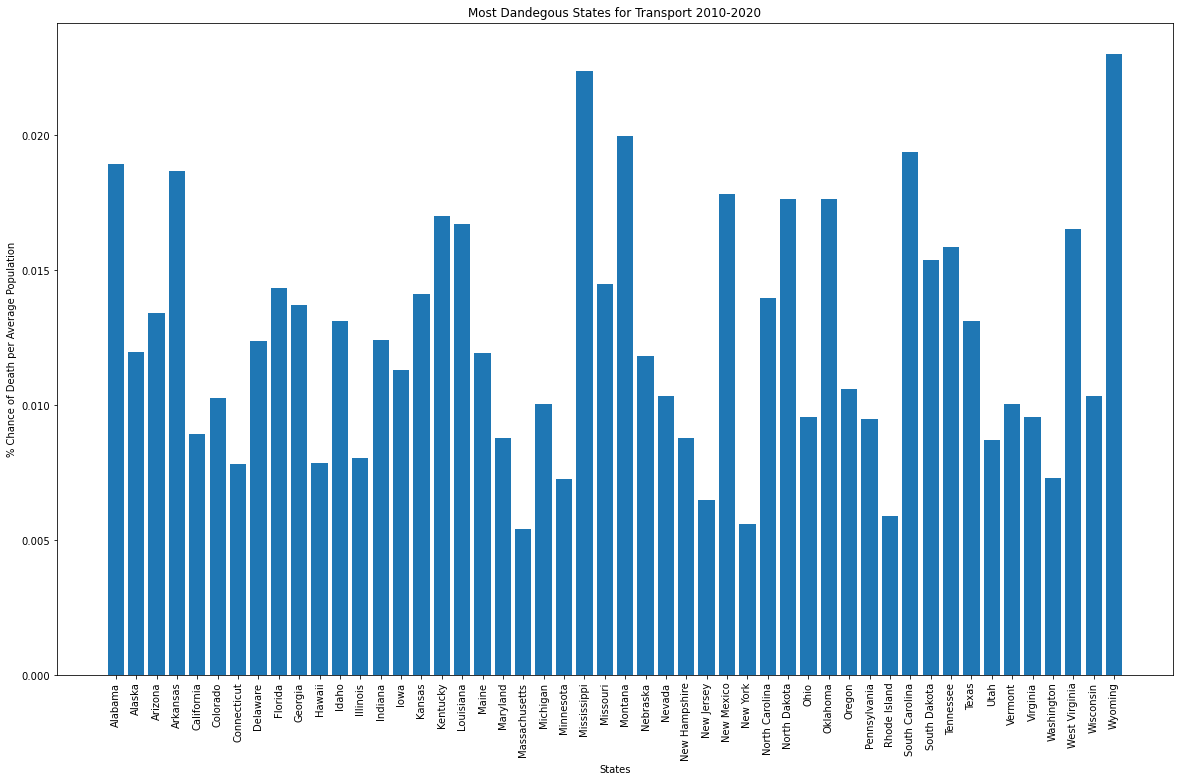

In [90]:
x_axis = Sum_Fatal_Accidents2["State"]                                                                                                      #Plotted the data for most dangerous states for all transport
y_axis = Sum_Fatal_Accidents2["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [91]:
Safest_State = Sum_Fatal_Accidents2.nsmallest(5, '% Death Per Person')                                  #Stored the 5 safest states into a variable
Safest_State   

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
20,Massachusetts,3921.0,5.0,0.0,113.0,4039.0,6784925.0,0.005412
31,New York,11922.0,23.0,5.0,252.0,12202.0,19766518.0,0.005612
38,Rhode Island,676.0,1.0,0.0,20.0,697.0,1074398.0,0.005898
29,New Jersey,6362.0,7.0,0.0,69.0,6438.0,9035819.0,0.006477
22,Minnesota,4222.0,12.0,0.0,158.0,4392.0,5505545.0,0.007252


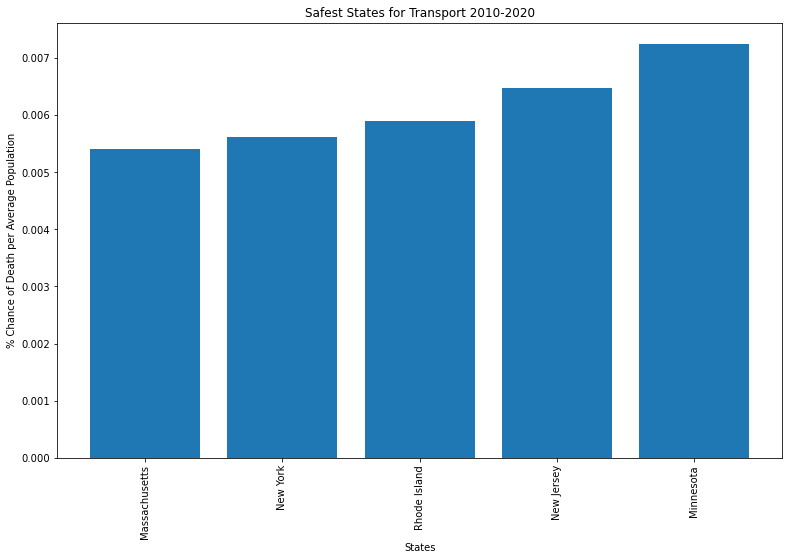

In [93]:
x_axis = Safest_State["State"]                                                                      #Ploted the 5 safest states
y_axis = Safest_State["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Safest States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [101]:
Most_danger = Sum_Fatal_Accidents2.nlargest(5, '% Death Per Person')                        #Stored the 5 most dangerous states into a variable
Most_danger

,State,Car Fatals,Trains,Plane,Boat,Total Deaths,Average Population,% Death Per Person
49,Wyoming,1415.0,5.0,0.0,25.0,1445.0,570447.0,0.023028
23,Mississippi,7179.0,24.0,0.0,96.0,7299.0,2962084.0,0.022401
25,Montana,2202.0,9.0,0.0,69.0,2280.0,1037804.0,0.019972
39,South Carolina,10184.0,13.0,0.0,210.0,10407.0,4878047.0,0.019395
0,Alabama,9993.0,18.0,2.0,199.0,10212.0,4902270.0,0.018937


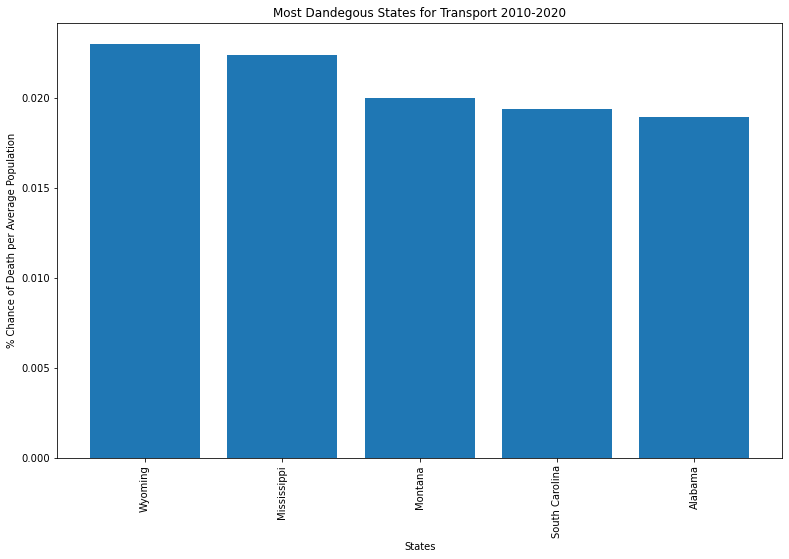

In [95]:
x_axis = Most_danger["State"]                                                               #plotted the 5 most dangerous states into a variable
y_axis = Most_danger["% Death Per Person"]

plt.bar(x_axis, y_axis, align="center")

plt.title("Most Dandegous States for Transport 2010-2020")
plt.xlabel("States")
plt.ylabel("% Chance of Death per Average Population")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (13,8)
plt.show()

In [104]:
Safety = pd.read_csv("Boat Resources/Safety Equipment Worn V3.csv")                             #Imported Life Jacket worn or not fatality data and removed empty data
Safety.dropna(inplace=True)
Safety.head()

,Year,Life Jacket Worn,Not Worn,Unknown
0,2010,119,471,49
1,2011,134,503,62
2,2012,121,472,11
3,2013,108,392,11
4,2014,105,411,19


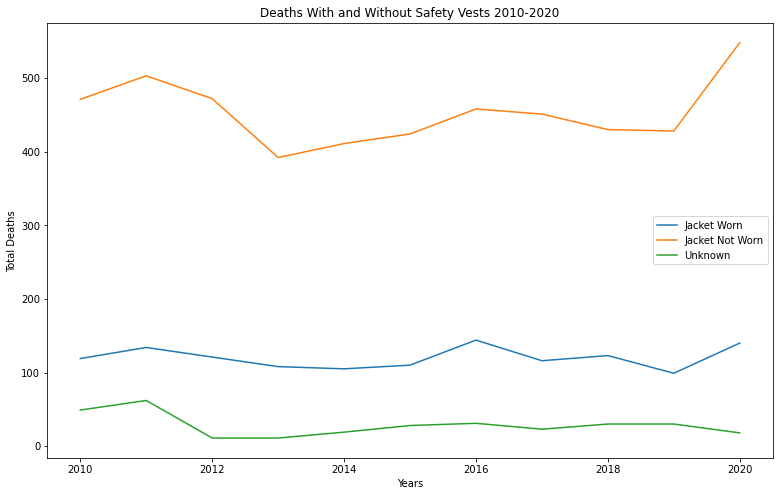

In [148]:
Worn = Safety['Life Jacket Worn']                                                               #plotted deaths without safety vest vs with safety vests
Not_Worn = Safety['Not Worn']
Unknown = Safety['Unknown']
Year = Safety['Year']

plt.title("Deaths With and Without Safety Vests 2010-2020")
plt.xlabel("Years")
plt.ylabel("Total Deaths")
plt.plot(Year, Worn, label ="Jacket Worn")
plt.plot(Year, Not_Worn, label ="Jacket Not Worn")
plt.plot(Year, Unknown, label ="Unknown")
plt.legend(loc="right")
plt.show()


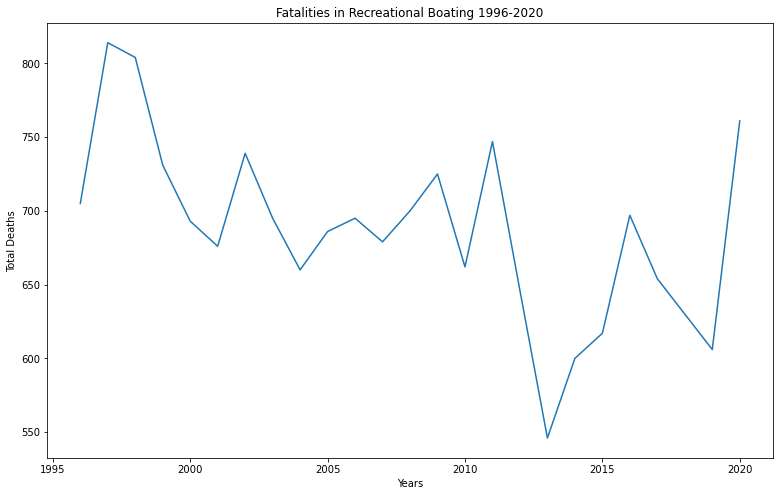

In [143]:
Year_1996 = (Fatalities["1996"].sum())                                                                                      #Stored each year of boating fatalities per year from 1996-2020 into variables and plotted a line graph
Year_1997 = (Fatalities["1997"].sum())
Year_1998 = (Fatalities["1998"].sum())
Year_1999 = (Fatalities["1999"].sum())
Year_2000 = (Fatalities["2000"].sum())
Year_2001 = (Fatalities["2001"].sum())
Year_2002 = (Fatalities["2002"].sum())
Year_2003 = (Fatalities["2003"].sum())
Year_2004 = (Fatalities["2004"].sum())
Year_2005 = (Fatalities["2005"].sum())
Year_2006 = (Fatalities["2006"].sum())
Year_2007 = (Fatalities["2007"].sum())
Year_2008 = (Fatalities["2008"].sum())
Year_2009 = (Fatalities["2009"].sum())
Year_2010 = (Fatalities["2010"].sum())
Year_2011 = (Fatalities["2011"].sum())
Year_2012 = (Fatalities["2012"].sum())
Year_2013 = (Fatalities["2013"].sum())
Year_2014 = (Fatalities["2014"].sum())
Year_2015 = (Fatalities["2015"].sum())
Year_2016 = (Fatalities["2016"].sum())
Year_2017 = (Fatalities["2017"].sum())
Year_2018 = (Fatalities["2018"].sum())
Year_2019 = (Fatalities["2019"].sum())
Year_2020 = (Fatalities["2020"].sum())
Fatalx = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Fataly = [Year_1996, Year_1997, Year_1998, Year_1999, Year_2000, Year_2001, Year_2002, Year_2003, Year_2004, Year_2005, Year_2006, Year_2007, Year_2008, Year_2009,
          Year_2010, Year_2011, Year_2012, Year_2013, Year_2014, Year_2015, Year_2016, Year_2017, Year_2018, Year_2019, Year_2020]

plt.title("Fatalities in Recreational Boating 1996-2020")
plt.xlabel("Years")
plt.ylabel("Total Deaths")
plt.plot(Fatalx, Fataly)
plt.show()



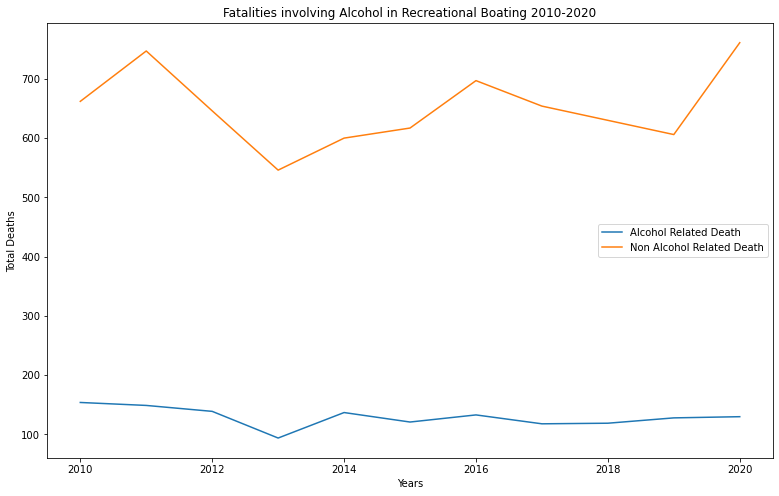

In [156]:
Alcohol_Fatal3 = Alcohol_Fatal.drop(columns=['Average Deaths'])                     #Stored each year of boating fatalitiescaused by alcohol per year from 2010-2020 into variables and plotted a line graph
Alcohol_Year_2010 = (Alcohol_Fatal3["2010"].sum())
Alcohol_Year_2011 = (Alcohol_Fatal3["2011"].sum())
Alcohol_Year_2012 = (Alcohol_Fatal3["2012"].sum())
Alcohol_Year_2013 = (Alcohol_Fatal3["2013"].sum())
Alcohol_Year_2014 = (Alcohol_Fatal3["2014"].sum())
Alcohol_Year_2015 = (Alcohol_Fatal3["2015"].sum())
Alcohol_Year_2016 = (Alcohol_Fatal3["2016"].sum())
Alcohol_Year_2017 = (Alcohol_Fatal3["2017"].sum())
Alcohol_Year_2018 = (Alcohol_Fatal3["2018"].sum())
Alcohol_Year_2019 = (Alcohol_Fatal3["2019"].sum())
Alcohol_Year_2020 = (Alcohol_Fatal3["2020"].sum())
Alcohol_Fatalx = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Alcohol_Fataly = [Alcohol_Year_2010, Alcohol_Year_2011, Alcohol_Year_2012, Alcohol_Year_2013, Alcohol_Year_2014, Alcohol_Year_2015, 
          Alcohol_Year_2016, Alcohol_Year_2017, Alcohol_Year_2018, Alcohol_Year_2019, Alcohol_Year_2020]
Fataly2 = [Year_2010, Year_2011, Year_2012, Year_2013, Year_2014, Year_2015, Year_2016, Year_2017, Year_2018, Year_2019, Year_2020]

plt.title("Fatalities involving Alcohol in Recreational Boating 2010-2020")
plt.xlabel("Years")
plt.ylabel("Total Deaths")
plt.plot(Alcohol_Fatalx, Alcohol_Fataly, label = "Alcohol Related Death")
plt.plot(Alcohol_Fatalx, Fataly2, label = "Non Alcohol Related Death")
plt.legend(loc="right")
plt.show()